In [12]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Loading the Dataset
#http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
#data frame
df = pd.read_csv(url, names=names)

In [14]:
print(df.describe())

                 id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
count  6.990000e+02       699.000000         699.000000          699.000000   
mean   1.071704e+06         4.417740           3.134478            3.207439   
std    6.170957e+05         2.815741           3.051459            2.971913   
min    6.163400e+04         1.000000           1.000000            1.000000   
25%    8.706885e+05         2.000000           1.000000            1.000000   
50%    1.171710e+06         4.000000           1.000000            1.000000   
75%    1.238298e+06         6.000000           5.000000            5.000000   
max    1.345435e+07        10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_cell_size  bland_chromatin  \
count         699.000000                   699.000000       699.000000   
mean            2.806867                     3.216023         3.437768   
std             2.855379                     2.214300         2.43

In [15]:
# Preprocess the data
# ? =missing values in dataset; -9999 means ignore them
df.replace('?',-9999,inplace=True)
print(df.axes)
#class= 4=>malignant(cancerous) ,2=>benign

#drop 'id' column because it does not contributes to dataset and may result in overfitting
df.drop(['id'],1,inplace=True)

#shape of dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


C:\Users\USER\AppData\Local\Temp\ipykernel_9552\2424456935.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'],1,inplace=True)


In [16]:
#Dataset Visualization
print(df.describe())



       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_cell_size  bland_chromatin  \
count         699.000000                   699.000000       699.000000   
mean            2.806867                     3.216023         3.437768   
std             2.855379                     2.214300         2.438364   
min             1.000000                     1.000000         1.000000   
25%             1.000000                    

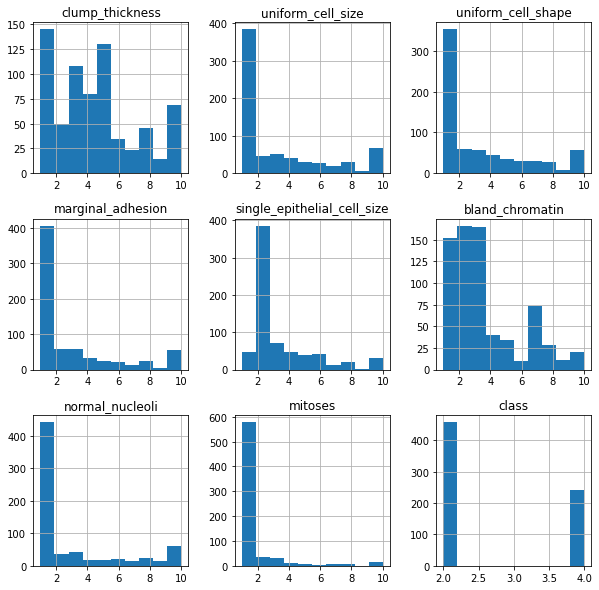

In [17]:
#Plot histograms for each feature to understand distribution
df.hist(figsize=(10,10))
plt.show()

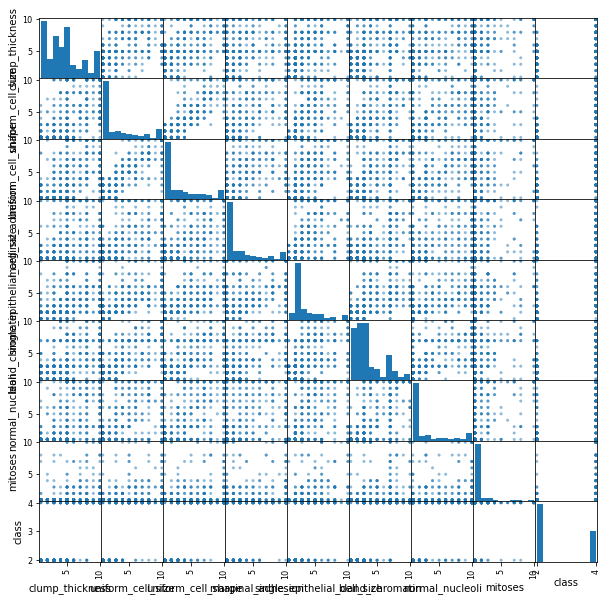

In [18]:
# Create scatter plot matrix
#tells whether linear classifier will work good for the dataset or not
#and to know realtionship between features
scatter_matrix(df,figsize=(10,10))
plt.show()


In [19]:

#create X and Y datasets for training 
print(df.loc[0])
X = np.array(df.drop(['class'],1))
print('class deleted')
print(X[0])
y = np.array(df['class'])
print(y[0])
print(X.shape,y.shape)
# No_of_rows X no_of_columns
#(no_of_rows,) => n X 1 vector or n-dim vector
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2) #a random split into training and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



clump_thickness                5
uniform_cell_size              1
uniform_cell_shape             1
marginal_adhesion              1
single_epithelial_cell_size    2
bare_nuclei                    1
bland_chromatin                3
normal_nucleoli                1
mitoses                        1
class                          2
Name: 0, dtype: object
class deleted
[5 1 1 1 2 '1' 3 1 1]
2
(699, 9) (699,)
(559, 9) (559,)
(140, 9) (140,)


C:\Users\USER\AppData\Local\Temp\ipykernel_9552\2810470274.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['class'],1))


In [20]:
#specify testing parameters
seed = 8 #not a random seed for reproducable results
scoring = 'accuracy'

In [21]:
#define the models to train
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))# odd value to avoid ties 
models.append(('SVM',SVC()))

#Evaluate each model
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True) #run 10 times and select the best results
    cv_results =model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring) #fitting a model and computing the score
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg) #accuracy only on training data
print(results)

KNN: 0.967760 (0.026326)
SVM: 0.643961 (0.059191)
[array([0.98214286, 0.98214286, 0.96428571, 1.        , 1.        ,
       0.91071429, 0.96428571, 0.94642857, 0.98214286, 0.94545455]), array([0.64285714, 0.66071429, 0.60714286, 0.55357143, 0.67857143,
       0.60714286, 0.75      , 0.73214286, 0.58928571, 0.61818182])]


In [22]:
#Make predictions on validation dataset

for name,model in models:
    model.fit(X_train,y_train) #training the model
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       0.98      1.00      0.99        98
           4       1.00      0.95      0.98        42

    accuracy                           0.99       140
   macro avg       0.99      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

SVM
0.7
              precision    recall  f1-score   support

           2       0.70      1.00      0.82        98
           4       0.00      0.00      0.00        42

    accuracy                           0.70       140
   macro avg       0.35      0.50      0.41       140
weighted avg       0.49      0.70      0.58       140



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
clf =SVC()

clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy*100)

example=np.array([[4,2,1,1,1,2,3,2,5]])
# print(example.shape)
# print(example)
# example=example.reshape(len(example),-1) #row to column vector
# print(example.shape)
# print(example)

prediction=clf.predict(example)
print(prediction)

66.42857142857143
[2]
